## knncv

From A First Course in Machine Learning, Chapter 5.

Simon Rogers, 01/11/21 [simon.d.rogers@gmail.com]

KNN with cross-validation to determine K

Generate some data with class imbalance

In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

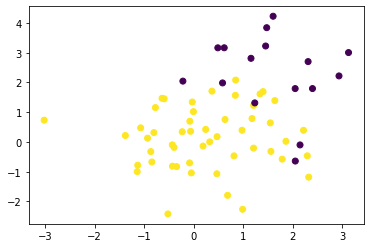

In [5]:
n = 50
X1 = np.random.multivariate_normal(
    [0, 0],
    np.eye(2),
    size=n
)
X2 = np.random.multivariate_normal(
    [2, 2],
    np.eye(2),
    size=int(n/3)
)
t1 = np.ones(n, int)
t2 = np.zeros(int(n/3), int)

X = np.vstack((X1, X2))
t = np.hstack((t1, t2))

plt.scatter(X[:, 0], X[:, 1], c=t)

In [6]:
class KNN(object):
    def __init__(self, X, t, K):
        self.X = X
        self.t = t
        self.K = K
        self.classes = sorted(np.unique(self.t))
    
    def classify(self, testX):
        testN, _ = testX.shape
        predictions = np.zeros(testN, int)
        for n in range(testN):
            # compute squared distance between test point and train points
            distances = ((self.X - testX[n, :][None, :])**2).sum(axis=1)
            
            # arg sort to get sorting indices
            idx = np.argsort(distances)
            
            # find the top K classes
            votes = self.t[idx[:self.K]]
            
            # tally the votes
            v_counts = [list(votes).count(i) for i in self.classes]
            
            # sort the counts and keep all tied at the top
            count_class = list(zip(v_counts, self.classes))
            count_class.sort(key = lambda x: x[0], reverse=True)
            possible_classes = []
            for count, cl in count_class:
                if count == count_class[0][0]:
                    possible_classes.append(cl)
                else:
                    break # must be past the tie
            
            # randomly break a tie
            predictions[n] = np.random.choice(possible_classes)
            
        return predictions

Do some cross-validation

In [26]:
from sklearn.model_selection import KFold
N_FOLD = 5
MAX_K = 30

# create the kfold splitter, make sure we shuffle
kf = KFold(n_splits=N_FOLD, shuffle=True)
all_error = {}

# loop over folds
for train_index, test_index in kf.split(X):
    # loop over K
    for K in range(1, MAX_K + 1):
        if not K in all_error:
            all_error[K] = []
            
        trainX, traint = X[train_index], t[train_index]
        testX, testt = X[test_index], t[test_index]

        preds = KNN(trainX, traint, K).classify(testX)
        
        error = (preds != testt).mean()
        all_error[K].append(error)

Plot the mean error as a function of K

Text(0, 0.5, 'Mean CV error')

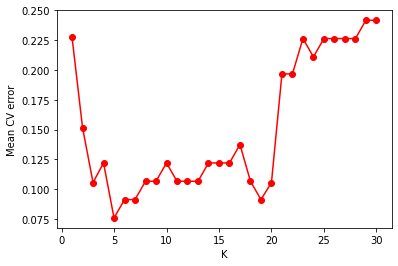

In [27]:
mean_error = [(K, np.array(all_error[K]).mean()) for K in all_error]
K_vals, error_vals = zip(*mean_error)
plt.plot(K_vals, error_vals, 'ro-')
plt.xlabel('K')
plt.ylabel('Mean CV error')